In [136]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

In [137]:
# Global options

FDR = 0.05
logCPM = 2


sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-10, 4)
alpha=1
# marker='o'
s=10
legend=False
linewidth=0

In [138]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    df.head()
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [139]:
def merge_df(df_1, df_2, df_1_name, df_2_name):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="right")
    
    df["Significant"] = "No"
    
    df.loc[(df[f"FDR_{df_1_name}"]<0.05),
               "Significant"] = f"FDR_{df_1_name}<0.05"
    
    df.loc[(df[f"FDR_{df_2_name}"]<0.05),
               "Significant"] = f"FDR_{df_2_name}<0.05"
    
    df.loc[(df[f"FDR_{df_1_name}"]<0.05) &
               (df[f"FDR_{df_2_name}"]<0.05),
                "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"
    
    return df

In [140]:
def prepare_sc_plot(df, df_1_name, df_2_name):
    sns_plot = sns.scatterplot(x=f"logFC_{df_1_name}",
                               y=f"logFC_{df_2_name}",
                               data=df.sort_values("Significant", ascending=False),
                               s=s,
                               hue="Significant",
                               hue_order=["No", f"FDR_{df_1_name}<0.05", f"FDR_{df_2_name}<0.05", f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"],
                               palette=["gray", "blue", "orange", "red"],
                               alpha=alpha,
                               x_jitter=x_jitter,
                               y_jitter=y_jitter,
                               linewidth=linewidth)
#     sns_plot.set(xlim=xlim, ylim=ylim)

    return sns_plot

In [173]:
!ls ../results/gene_comparison/DE__WT__Dpf_3_null/DE_edgeR/count_genomic_alignment_htseq_multi_mappers_forDE/

BCV.pdf  MDS.pdf  final_table.tsv	   ma_plot.pdf	volcano_plot.pdf
BCV.png  MDS.png  final_table_FDR_low.tsv  ma_plot.png	volcano_plot.png


In [149]:
Dpf_3_null_path = "../results/gene_comparison/DE__WT__Dpf_3_null/DE_edgeR/count_genomic_alignment_htseq_multi_mappers_forDE/final_table.tsv"
Dpf_3_null_name = "Dpf_3_null"

Dpf_3_null_A_B_C_path = "../results/gene_comparison/DE__WT_A_B_C__Dpf_3_null/DE_edgeR/count_genomic_alignment_htseq_multi_mappers_forDE/final_table.tsv"
Dpf_3_null_A_B_C_name = "Dpf_3_null_A_B_C"

Dpf_3_null_D_E_F_path = "../results/gene_comparison/DE__WT_D_E_F__Dpf_3_null/DE_edgeR/count_genomic_alignment_htseq_multi_mappers_forDE/final_table.tsv"
Dpf_3_null_D_E_F_name = "Dpf_3_null_D_E_F"

Dpf_3_null_B_D_F_path = "../results/gene_comparison/DE__WT_B_D_F__Dpf_3_null/DE_edgeR/count_genomic_alignment_htseq_multi_mappers_forDE/final_table.tsv"
Dpf_3_null_B_D_F_name = "Dpf_3_null_B_D_F"

Dpf_3_null_A_C_E_path = "../results/gene_comparison/DE__WT_A_C_E__Dpf_3_null/DE_edgeR/count_genomic_alignment_htseq_multi_mappers_forDE/final_table.tsv"
Dpf_3_null_A_C_E_name = "Dpf_3_null_A_C_E"

Dpf_3_S784A_D_E_F_path = "../results/gene_comparison/DE__WT_D_E_F__Dpf_3_S784A/DE_edgeR/count_genomic_alignment_htseq_multi_mappers_forDE/final_table.tsv"
Dpf_3_S784A_D_E_F_name = "Dpf_3_S784A_D_E_F"

In [150]:
# read in dataframe
df_Dpf_3_null = prepare_df(Dpf_3_null_path, Dpf_3_null_name)
df_Dpf_3_null_A_B_C = prepare_df(Dpf_3_null_A_B_C_path, Dpf_3_null_A_B_C_name)
df_Dpf_3_null_D_E_F = prepare_df(Dpf_3_null_D_E_F_path, Dpf_3_null_D_E_F_name)
df_Dpf_3_null_B_D_F = prepare_df(Dpf_3_null_B_D_F_path, Dpf_3_null_B_D_F_name)
df_Dpf_3_null_A_C_E = prepare_df(Dpf_3_null_A_C_E_path, Dpf_3_null_A_C_E_name)
df_Dpf_3_S784A_D_E_F = prepare_df(Dpf_3_S784A_D_E_F_path, Dpf_3_S784A_D_E_F_name)

In [175]:
df_Dpf_3_null_sig = df_Dpf_3_null[(df_Dpf_3_null["Significant_Dpf_3_null"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_null_A_B_C_sig = df_Dpf_3_null_A_B_C[(df_Dpf_3_null_A_B_C["Significant_Dpf_3_null_A_B_C"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_null_D_E_F_sig = df_Dpf_3_null_D_E_F[(df_Dpf_3_null_D_E_F["Significant_Dpf_3_null_D_E_F"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_null_B_D_F_sig = df_Dpf_3_null_B_D_F[(df_Dpf_3_null_B_D_F["Significant_Dpf_3_null_B_D_F"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_null_A_C_E_sig = df_Dpf_3_null_A_C_E[(df_Dpf_3_null_A_C_E["Significant_Dpf_3_null_A_C_E"]=="FDR<0.05")]["id"].tolist()

df_Dpf_3_S784A_D_E_F_sig = df_Dpf_3_S784A_D_E_F[(df_Dpf_3_S784A_D_E_F["Significant_Dpf_3_S784A_D_E_F"]=="FDR<0.05")]["id"].tolist()

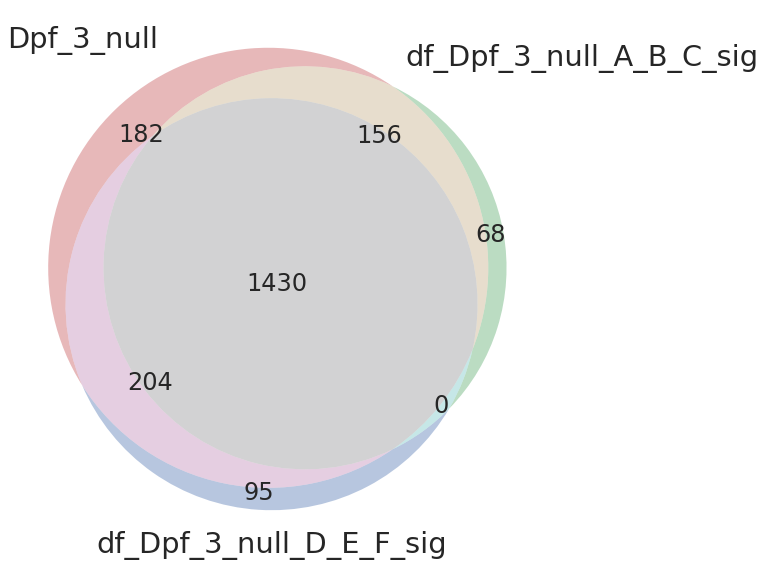

In [147]:
sns.set_style("white")
plt.figure(figsize=(10,10))
venn3([set(df_Dpf_3_null_sig), set(df_Dpf_3_null_A_B_C_sig), set(df_Dpf_3_null_D_E_F_sig)], ['Dpf_3_null', 'df_Dpf_3_null_A_B_C_sig', 'df_Dpf_3_null_D_E_F_sig'])

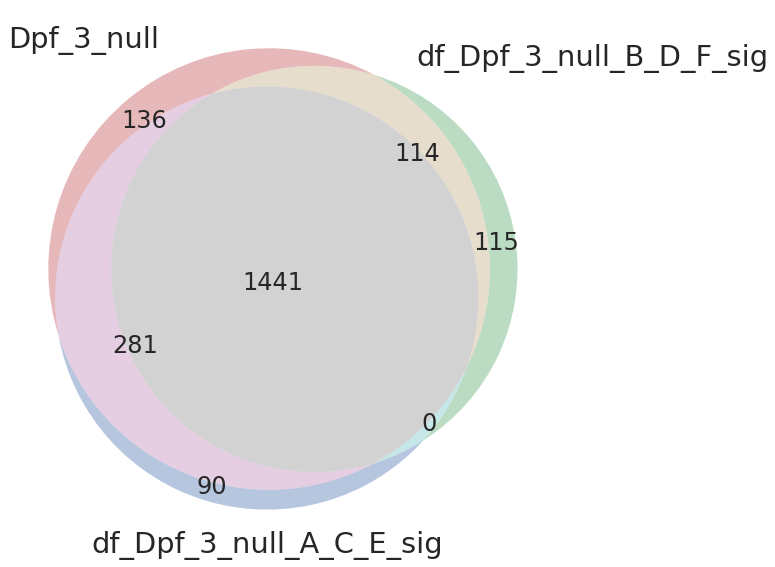

In [148]:
sns.set_style("white")
plt.figure(figsize=(10,10))
venn3([set(df_Dpf_3_null_sig), set(df_Dpf_3_null_B_D_F_sig), set(df_Dpf_3_null_A_C_E_sig)], ['Dpf_3_null', 'df_Dpf_3_null_B_D_F_sig', 'df_Dpf_3_null_A_C_E_sig'])

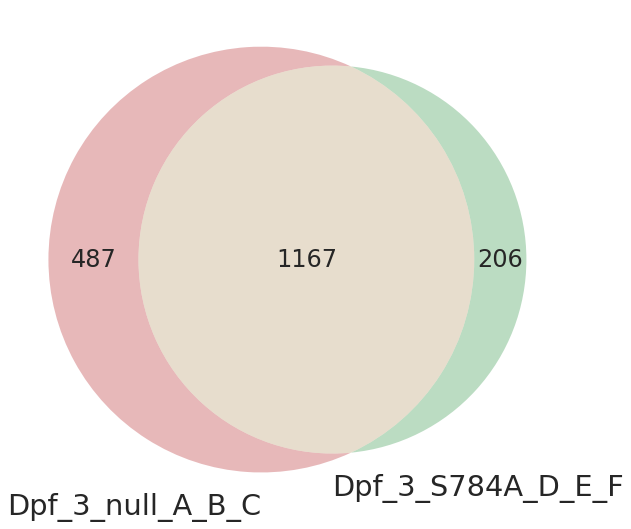

In [176]:
sns.set_style("white")
plt.figure(figsize=(10,10))
venn2([set(df_Dpf_3_null_A_B_C_sig), set(df_Dpf_3_S784A_D_E_F_sig)], ['Dpf_3_null_A_B_C', 'Dpf_3_S784A_D_E_F'])

# scatterplots

In [151]:
df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F = merge_df(df_Dpf_3_null_A_B_C, df_Dpf_3_null_D_E_F, Dpf_3_null_A_B_C_name, Dpf_3_null_D_E_F_name)

In [152]:
df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F.head()

,id,logFC_Dpf_3_null_A_B_C,logCPM_Dpf_3_null_A_B_C,LR_Dpf_3_null_A_B_C,PValue_Dpf_3_null_A_B_C,FDR_Dpf_3_null_A_B_C,Significant_Dpf_3_null_A_B_C,logFC_Dpf_3_null_D_E_F,logCPM_Dpf_3_null_D_E_F,LR_Dpf_3_null_D_E_F,PValue_Dpf_3_null_D_E_F,FDR_Dpf_3_null_D_E_F,Significant_Dpf_3_null_D_E_F,Significant
0,WBGene00000001,1.587232,3.188632,2.331627,0.126769,1.000000,No,-0.344462,3.574706,0.212311,0.644962,1.000000,No,No
1,WBGene00000002,0.000000,1.914965,0.000000,1.000000,1.000000,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
2,WBGene00000003,0.000000,1.914965,0.000000,1.000000,1.000000,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
3,WBGene00000004,0.000000,1.914965,0.000000,1.000000,1.000000,No,-1.735710,1.745245,1.036252,0.308695,1.000000,No,No
4,WBGene00000005,3.164615,2.238189,3.067038,0.079895,0.850581,No,3.359843,1.963520,3.580361,0.058466,0.724587,No,No


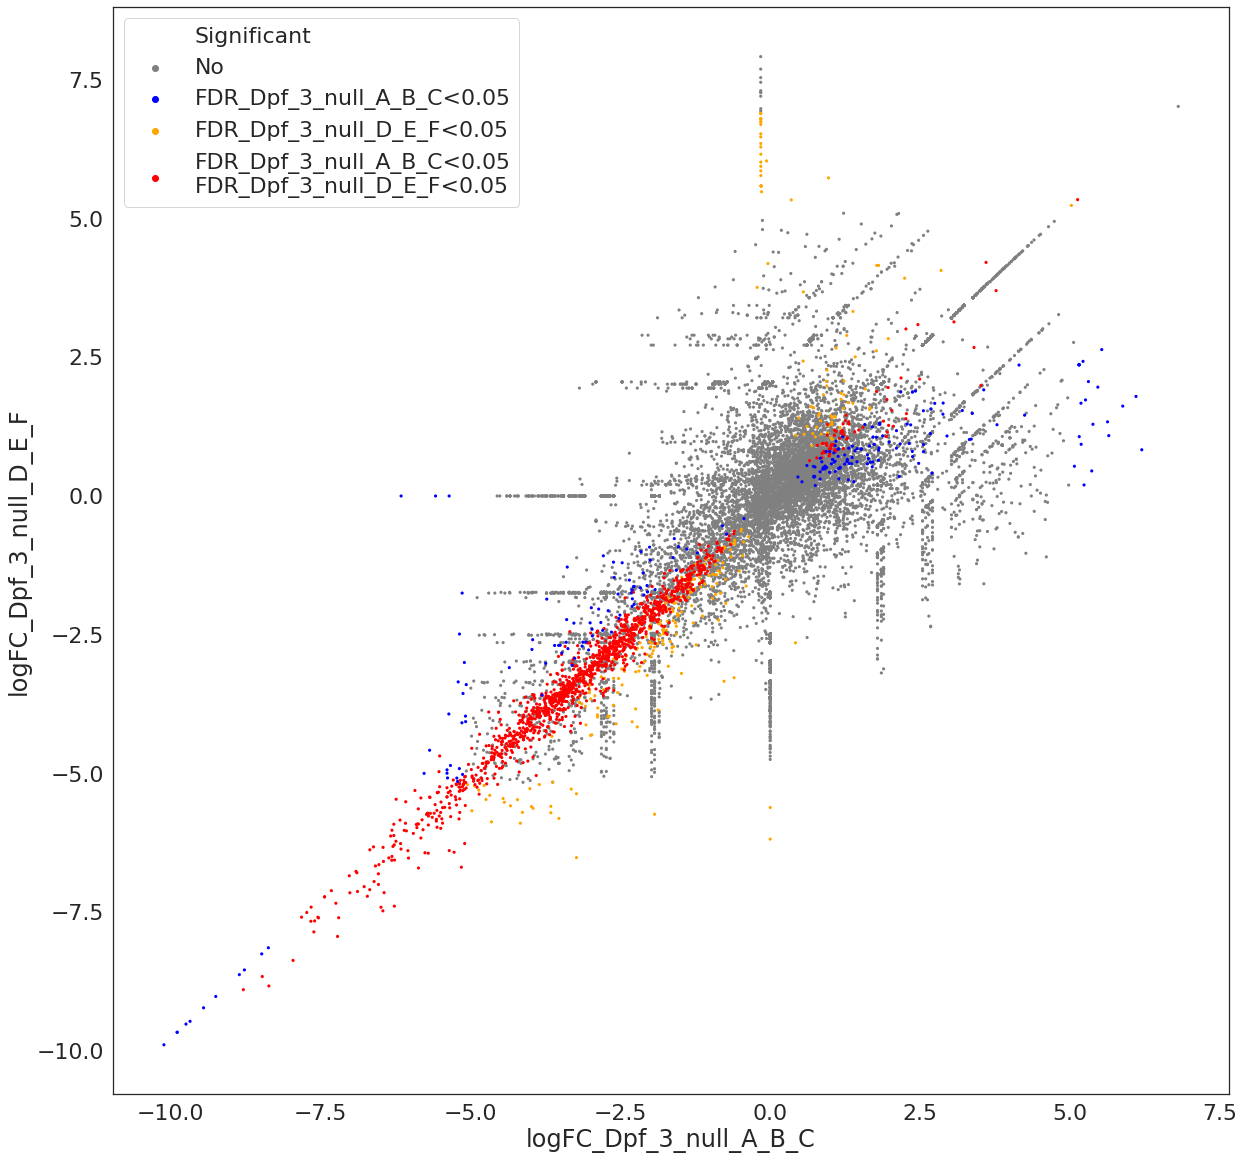

In [153]:
plt.figure(figsize=(20,20))
df_wago_9_Dpf_3_null_lm = prepare_sc_plot(df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F, Dpf_3_null_A_B_C_name, Dpf_3_null_D_E_F_name)

In [154]:
df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F["Significant"].value_counts()

No                                                      45307
FDR_Dpf_3_null_A_B_C<0.05\nFDR_Dpf_3_null_D_E_F<0.05     1430
FDR_Dpf_3_null_D_E_F<0.05                                 299
FDR_Dpf_3_null_A_B_C<0.05                                 224
Name: Significant, dtype: int64

# scatterplots null and point mutant

In [155]:
df_Dpf_3_null_A_B_C_with_Dpf_3_S784A_D_E_F = merge_df(df_Dpf_3_null_A_B_C, df_Dpf_3_S784A_D_E_F, Dpf_3_null_A_B_C_name, Dpf_3_S784A_D_E_F_name)

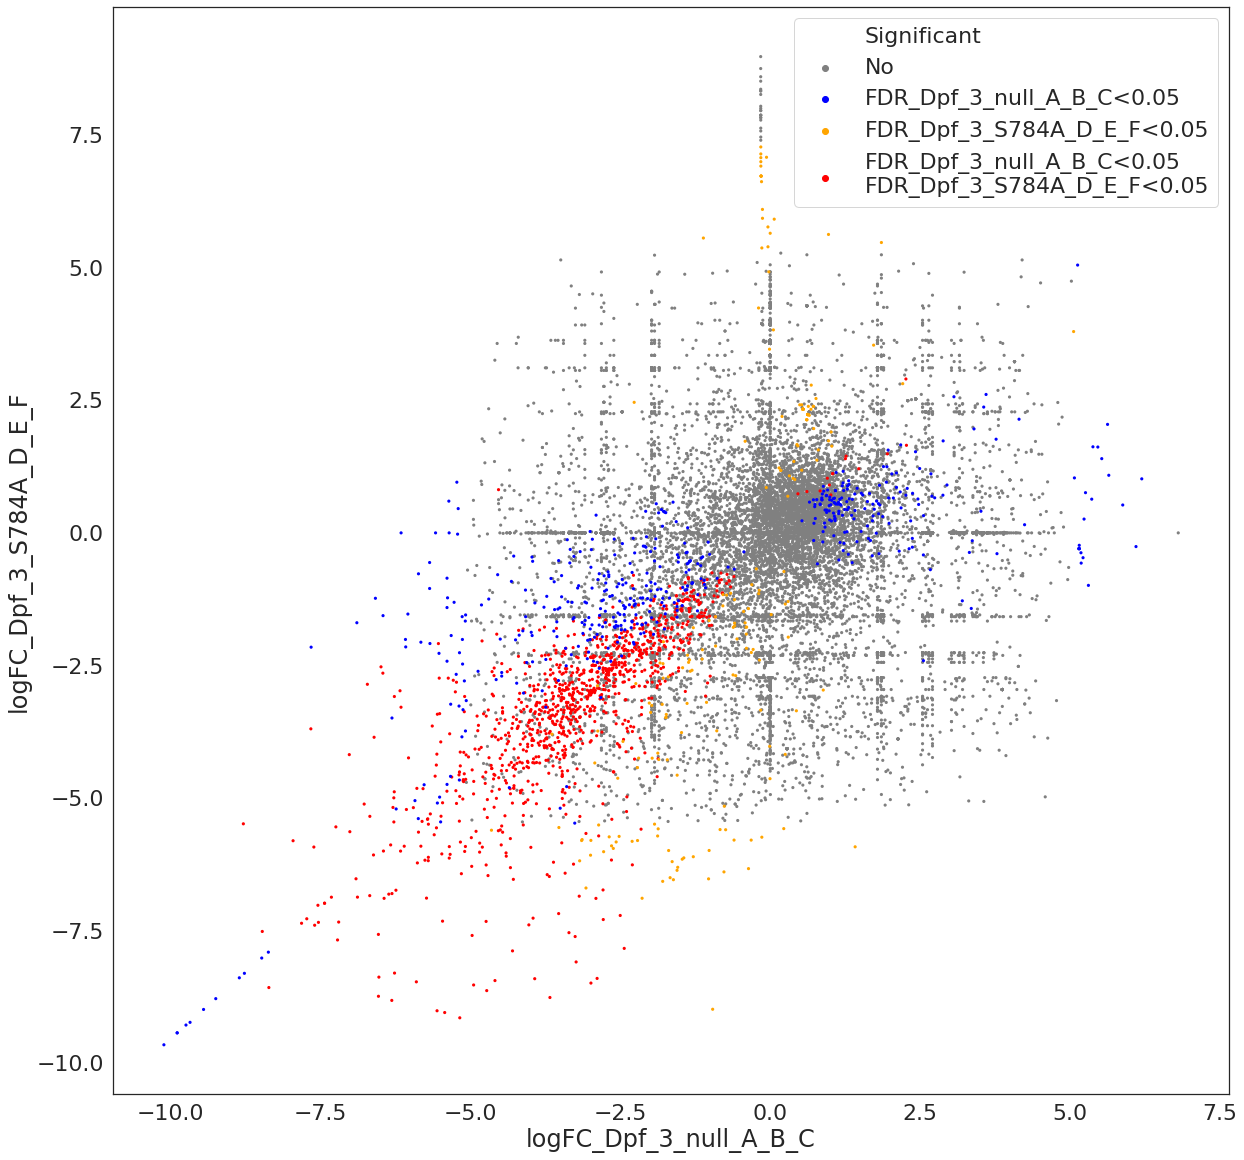

In [156]:
plt.figure(figsize=(20,20))
df_wago_9_Dpf_3_null_lm = prepare_sc_plot(df_Dpf_3_null_A_B_C_with_Dpf_3_S784A_D_E_F, Dpf_3_null_A_B_C_name, Dpf_3_S784A_D_E_F_name)

In [157]:
df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F["Significant"].value_counts()

No                                                      45307
FDR_Dpf_3_null_A_B_C<0.05\nFDR_Dpf_3_null_D_E_F<0.05     1430
FDR_Dpf_3_null_D_E_F<0.05                                 299
FDR_Dpf_3_null_A_B_C<0.05                                 224
Name: Significant, dtype: int64

In [160]:
df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F.sort_values("Significant", ascending=False)

,id,logFC_Dpf_3_null_A_B_C,logCPM_Dpf_3_null_A_B_C,LR_Dpf_3_null_A_B_C,PValue_Dpf_3_null_A_B_C,FDR_Dpf_3_null_A_B_C,Significant_Dpf_3_null_A_B_C,logFC_Dpf_3_null_D_E_F,logCPM_Dpf_3_null_D_E_F,LR_Dpf_3_null_D_E_F,PValue_Dpf_3_null_D_E_F,FDR_Dpf_3_null_D_E_F,Significant_Dpf_3_null_D_E_F,Significant
0,WBGene00000001,1.587232,3.188632,2.331627,1.267693e-01,1.000000e+00,No,-0.344462,3.574706,0.212311,0.644962,1.000000,No,No
31393,WBGene00168504,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
31395,WBGene00168506,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
31396,WBGene00168507,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
31397,WBGene00168508,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
31398,WBGene00168509,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
31399,WBGene00168510,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
31400,WBGene00168511,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
31401,WBGene00168512,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
31402,WBGene00168513,0.000000,1.914965,0.000000,1.000000e+00,1.000000e+00,No,0.000000,1.633054,0.000000,1.000000,1.000000,No,No
